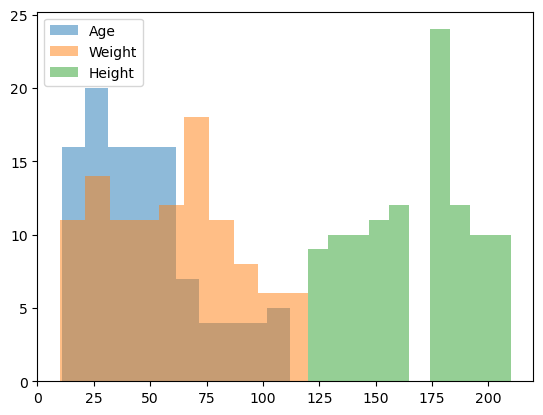

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats


dane = pd.read_csv("obesityclassification.csv")

#histogram of age,weight and height
plt.hist(dane['Age'], bins=10, alpha=.5)
plt.hist(dane['Weight'], bins=10, alpha=.5)
plt.hist(dane['Height'], bins=10, alpha=.5)
plt.legend(['Age', 'Weight','Height'])
plt.show()


In [2]:
#number of females and males
by_gender = dane.groupby('Gender')
by_gender.size()

Gender
Female    52
Male      56
dtype: int64

<Axes: xlabel='Label'>

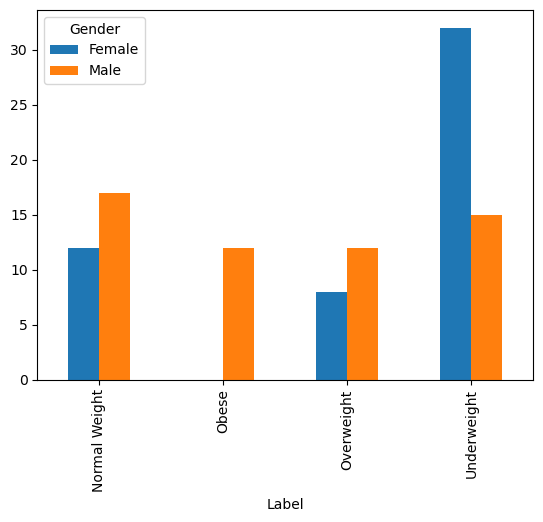

In [3]:
#dividing regards sex
by_label_gen = dane.groupby(['Label','Gender'])
by_label_gen.size().unstack().plot(kind='bar')

In [4]:
#weight classification
label = dane["Label"].value_counts()
label

Underweight      47
Normal Weight    29
Overweight       20
Obese            12
Name: Label, dtype: int64

In [85]:
sigma = np.std(dane["Weight"])
print('Std: ', sigma)
mu = np.mean(dane["Weight"])
print('Mean: ', mu)
mi = np.min(dane["Weight"])
print('Min: ', mi)
ma = np.max(dane["Weight"])
print('Max: ', ma)
mediana = np.median(dane["Weight"])
print('Median: ', mediana)
var = sigma**2
print('Variance: ', var)

Std:  28.722328187114982
Mean:  59.49074074074074
Min:  10
Max:  120
Median:  55.0
Variance:  824.9721364883399


In [6]:
sigma2 = np.std(dane["Height"])
print('Std: ', sigma2)
mu2 = np.mean(dane["Height"])
print('Mean: ', mu2)
mi2 = np.min(dane["Height"])
print('Min: ', mi2)
ma2 = np.max(dane["Height"])
print('Max: ', ma2)
mediana2 = np.median(dane["Height"])
print('Median: ', mediana2)
var2 = sigma**2
print('Variance: ', var2)

Std:  27.74426991347132
Mean:  166.57407407407408
Min:  120
Max:  210
Median:  175.0
Variance:  824.9721364883399


In [7]:
sigma3 = np.std(dane["Age"])
print('Std: ', sigma3)
mu3 = np.mean(dane["Age"])
print('Mean: ', mu3)
mi3 = np.min(dane["Age"])
print('Min: ', mi3)
ma3 = np.max(dane["Age"])
print('Max: ', ma3)
mediana3 = np.median(dane["Age"])
print('Median: ', mediana3)
var3 = sigma**2
print('Variance: ', var3)

Std:  24.605906146369634
Mean:  46.55555555555556
Min:  11
Max:  112
Median:  42.5
Variance:  824.9721364883399


In [8]:
import scipy.stats as stats
import numpy as np


waga = dane["Weight"].values
exp1 = np.full(108, mu)

test1 = stats.chisquare(waga,exp1)
print(test1)


Power_divergenceResult(statistic=1497.661478599222, pvalue=9.033239977633606e-244)


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats


dane = pd.read_csv("obesityclassification.csv")

#chi square test on weight and age
test = pd.crosstab(dane['Weight'],dane['Age'])
stat, p, dof, expected = stats.chi2_contingency(test)
prob = 0.95
critical = stats.chi2.ppf(prob, dof)
print(p)
if abs(stat) >= critical:
    print('Zalezne (odrzucamy H0)')
else:
    print('Niezalezne (nie mozna odrzucic H0)')

0.17695521223576952
Niezalezne (nie mozna odrzucic H0)


In [10]:
#chi square test on weight and height
test1 = pd.crosstab(dane['Weight'],dane['Height'])
stat1, p1, dof1, expected1 = stats.chi2_contingency(test1)
prob = 0.95
critical1 = stats.chi2.ppf(prob, dof1)
print(p1)
if abs(stat1) >= critical1:
    print('Zalezne (odrzucamy H0)')
else:
    print('Niezalezne (nie mozna odrzucic H0)')

0.1634806819071651
Niezalezne (nie mozna odrzucic H0)


In [11]:
#chi square test on height and age
test2 = pd.crosstab(dane['Age'],dane['Height'])
stat2, p2, dof2, expected2 = stats.chi2_contingency(test2)
prob = 0.95
critical2 = stats.chi2.ppf(prob, dof2)
print(p2)
if abs(stat2) >= critical2:
    print('Zalezne (odrzucamy H0)')
else:
    print('Niezalezne (nie mozna odrzucic H0)')

0.7026238265341349
Niezalezne (nie mozna odrzucic H0)


In [68]:
#Wilcoxon test
alfa = 0.05

stat_w, p_w = stats.wilcoxon(dane['Weight'], dane['Age'])
print(stat_w, p_w)
if p_w > alfa:
    print('H0 akceptujemy. Rozklady sa takie same')
else:
    print('H0 odrzucamy. Rozklady sa rozne')


1500.0 9.665215367295471e-06
H0 odrzucamy. Rozklady sa rozne


In [100]:
#correlation test
waga = dane['Weight']
wiek = dane['Age']
wzrost = dane['Height']

corr, _ = stats.pearsonr(waga, wiek)
print('Pearsons correlation between weight and age: %.3f' % corr)

corr1, _ = stats.pearsonr(waga, wzrost)
print('Pearsons correlation between weight and height: %.3f' % corr1)

corr2, _ = stats.pearsonr(wiek, wzrost)
print('Pearsons correlation between age and height: %.3f' % corr2)

Pearsons correlation between weight and age: 0.465
Pearsons correlation between weight and height: 0.429
Pearsons correlation between age and height: -0.077


In [14]:
#

In [73]:
#bootstrap verification
n = 1000
bootstrap_stats = np.zeros(n)
waga = dane['Weight']
wiek = dane['Age']

for i in range(n):
    combined_data = np.concatenate((waga, wiek))
    resampled_data = np.random.choice(combined_data, size=len(combined_data), replace=True)
    
    resampled_sample1 = resampled_data[:len(waga)]
    resampled_sample2 = resampled_data[len(wiek):]
    
    _, pw = stats.wilcoxon(resampled_sample1, resampled_sample2)
    bootstrap_stats[i] = pw
    
_, observed_p_value = stats.wilcoxon(waga, wiek)


bootstrap_p_value = (np.sum(bootstrap_stats >= observed_p_value) + 1) / (n + 1)

print("Observed p-value:", observed_p_value)
print("Bootstrap p-value:", bootstrap_p_value)


Observed p-value: 9.665215367295471e-06
Bootstrap p-value: 1.0


In [103]:

bootstrap=pd.DataFrame({'Weight_Mean':[dane.sample(500,replace=True)['Weight'].mean() for i in range(0,1000)]})

print((bootstrap['Weight_Mean'].quantile(0.025),bootstrap['Weight_Mean'].quantile(0.975)))
print(dane['Weight'].mean())

(57.04, 62.07)
59.49074074074074


In [104]:

bootstrap1=pd.DataFrame({'Age_Mean':[dane.sample(500,replace=True)['Age'].mean() for i in range(0,1000)]})
print((bootstrap1['Age_Mean'].quantile(0.025),bootstrap1['Age_Mean'].quantile(0.975)))
print(dane['Age'].mean())

(44.45375, 48.706050000000005)
46.55555555555556


In [107]:
bootstrap2=pd.DataFrame({'Height_Mean':[dane.sample(500,replace=True)['Height'].mean() for i in range(0,1000)]})
print((bootstrap2['Height_Mean'].quantile(0.025),bootstrap2['Height_Mean'].quantile(0.975)))
print(dane['Height'].mean())

(164.2295, 169.21025)
166.57407407407408


In [80]:
correlation, p_p = stats.pearsonr(waga, wzrost)
N = 1000
bootstrapped_correlations = np.zeros(iterations)
alfa = 0.05
n = len(waga)
for i in range(N):
    resampled_data = dane.sample(n, replace=True)
    
    resampled_correlation, _ = stats.pearsonr(resampled_data['Weight'], resampled_data['Height'])
    
    bootstrapped_correlations[i] = resampled_correlation
bootstrap_p_value1 = (np.abs(bootstrapped_correlations) >= np.abs(correlation)).mean()
print('Bootstrap p-value:', bootstrap_p_value1)

if bootstrap_p_value1 < p_p:
    print('observed correlation is statistically significant based on the bootstrap method')
else:
    print('observed correlation isnt statistically significant based on the bootstrap method')

Bootstrap p-value: 0.491
observed correlation isnt statistically significant based on the bootstrap method


In [81]:
correlation1, p_value1 = stats.pearsonr(waga, wiek)
bootstrapped_correlations1 = np.zeros(iterations)                                     
n1 = len(waga)
for i in range(N):
    resampled_data1 = dane.sample(n1, replace=True)
    
    resampled_correlation1, _ = stats.pearsonr(resampled_data1['Weight'], resampled_data1['Age'])
    
    bootstrapped_correlations1[i] = resampled_correlation1
bootstrap_p_value2 = (np.abs(bootstrapped_correlations1) >= np.abs(correlation1)).mean()
print('Bootstrap p-value:', bootstrap_p_value2)

if bootstrap_p_value2 < p_value1:
    print('observed correlation is statistically significant based on the bootstrap method')
else:
    print('observed correlation isnt statistically significant based on the bootstrap method')

Bootstrap p-value: 0.508
observed correlation isnt statistically significant based on the bootstrap method


In [78]:
correlation2, p_value2 = stats.pearsonr(wiek, wzrost)
bootstrapped_correlations2 = np.zeros(N)                                     
n2 = len(wiek)
for i in range(N):
    resampled_data2 = dane.sample(n2, replace=True)
    
    resampled_correlation2, _ = stats.pearsonr(resampled_data2['Age'], resampled_data2['Height'])
    
    bootstrapped_correlations2[i] = resampled_correlation2
bootstrap_p_value3 = (np.abs(bootstrapped_correlations2) >= np.abs(correlation2)).mean()
print('Bootstrap p-value:', bootstrap_p_value3)

if bootstrap_p_value3 < p_value2:
    print('observed correlation is statistically significant based on the bootstrap method')
else:
    print('observed correlation isnt statistically significant based on the bootstrap method')

Bootstrap p-value: 0.553
observed correlation isnt statistically significant based on the bootstrap method
